In [1]:
!pip install ultralytics
!git clone https://github.com/ultralytics/ultralytics.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.9 MB/s eta 0:00:00a 0:00:01
Cloning into 'ultralytics'...
remote: Enumerating objects: 15321, done.
remote: Counting objects: 100% (1452/1452), done.
remote: Compressing objects: 100% (858/858), done.
remote: Total 15321 (delta 994), reused 886 (delta 593), pack-reused 13869
Receiving objects: 100% (15321/15321), 8.51 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (10471/10471), done.


In [2]:
from ultralytics import YOLO
import pandas as pd
import os
from torchvision import transforms
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import shutil
from collections import defaultdict
import json
from pathlib import Path
import os
from PIL import Image, ImageDraw, ImageFont
from numpy import asarray
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten,Dense,Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam, Adamax
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import CSVLogger
np.random.seed(200)
!wandb disabled

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

W&B disabled.


In [3]:
model=YOLO('yolov8m-seg.pt')
model.train(
        project="VCOR",
        name="yolov8m-seg",
        deterministic=True,
        seed=43,
        data="coco128-seg.yaml", 
        save=True,
        save_period=5,
        pretrained=True,
        imgsz=224,
        epochs=8,
        batch=4,
        workers=8,
        val=True,
        lr0=0.018,
        patience=10,
        optimizer="SGD",
        momentum=0.947,
        weight_decay=0.0005,
        close_mosaic=3,
    )

100%|██████████| 52.4M/52.4M [00:01<00:00, 31.1MB/s]
Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=coco128-seg.yaml, epochs=8, patience=10, batch=4, imgsz=224, save=True, save_period=5, cache=False, device=None, workers=8, project=VCOR, name=yolov8m-seg, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=43, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=3, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxe

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de7058b5750>
fitness: 0.7730021944457617
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([    0.72724,     0.30678,    0.099606,       1.219,      1.2714,      1.1317,      1.7238,     0.39642,     0.73344,     0.18085,     0.74073,      1.1685,     0.74073,     0.27096,     0.95102,      1.4397,     0.90813,     0.84598,     0.74073,     0.74073,      1.117

In [4]:
def predict_image(img_path):
    img=cv2.imread(img_path)
    detect_result=model(img)
    detect_img=detect_result[0].plot()
   

    plt.imshow(detect_img)
    return detect_img


0: 160x224 3 cars, 1 bus, 1 truck, 185.1ms
Speed: 0.8ms preprocess, 185.1ms inference, 7.1ms postprocess per image at shape (1, 3, 160, 224)


array([[[ 79,  84,  91],
        [ 87,  92,  97],
        [ 84,  89,  95],
        ...,
        [ 10,  14,  18],
        [ 15,  18,  24],
        [  4,   4,   9]],

       [[ 83,  90,  94],
        [ 89,  94,  99],
        [ 85,  90,  95],
        ...,
        [ 15,  17,  22],
        [ 23,  26,  32],
        [ 13,  15,  21]],

       [[ 85,  92,  96],
        [ 94, 100, 104],
        [ 87,  93,  98],
        ...,
        [ 12,  14,  18],
        [ 20,  23,  29],
        [ 16,  20,  26]],

       ...,

       [[ 12,  12,  12],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 40,  94, 119],
        [ 37,  95, 121],
        [ 41, 102, 128]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [ 33,  70,  96],
        [ 43,  83, 113],
        [ 39,  82, 113]],

       [[  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 16,  33,  58],
        [ 27,  47,  78],
        [ 19,  44,  76]]

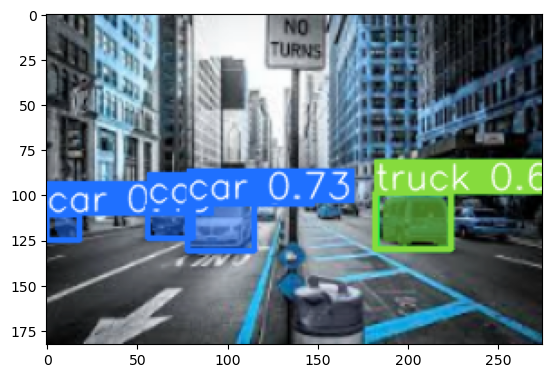

In [5]:
predict_image('/kaggle/input/street/street.jpg')


0: 160x224 8 persons, 4 cars, 149.4ms
Speed: 1.8ms preprocess, 149.4ms inference, 4.1ms postprocess per image at shape (1, 3, 160, 224)


array([[[ 85,  78,  61],
        [ 85,  78,  61],
        [ 85,  78,  61],
        ...,
        [187, 196, 214],
        [187, 196, 214],
        [187, 196, 214]],

       [[ 85,  78,  61],
        [ 85,  78,  61],
        [ 85,  78,  61],
        ...,
        [187, 196, 214],
        [187, 196, 214],
        [187, 196, 214]],

       [[ 85,  78,  61],
        [ 85,  78,  61],
        [ 85,  78,  61],
        ...,
        [187, 196, 214],
        [187, 196, 214],
        [187, 196, 214]],

       ...,

       [[185, 183, 184],
        [185, 183, 184],
        [185, 183, 184],
        ...,
        [205, 213, 225],
        [205, 213, 225],
        [205, 213, 225]],

       [[185, 183, 184],
        [185, 183, 184],
        [185, 183, 184],
        ...,
        [205, 213, 225],
        [205, 213, 225],
        [205, 213, 225]],

       [[185, 183, 184],
        [185, 183, 184],
        [185, 183, 184],
        ...,
        [205, 213, 225],
        [205, 213, 225],
        [205, 213, 225]]

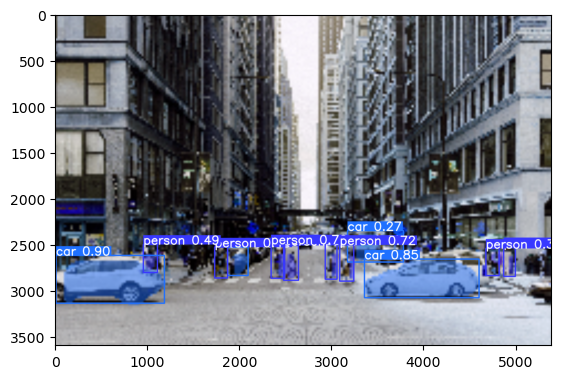

In [6]:
predict_image('/kaggle/input/streeeeeet/street2.jpg')

In [7]:
train = '../input/vcor-vehicle-color-recognition-dataset/train/'
val = '../input/vcor-vehicle-color-recognition-dataset/val/'
test = '../input/vcor-vehicle-color-recognition-dataset/test/'

In [8]:
def count_images(dataset):
    """
    dataset: 'train/' or 'test/'
    """
    v = []
    for i in sorted(os.listdir(dataset)):
        v.append(len(os.listdir(dataset+i)))
    df = pd.DataFrame({'color': sorted(os.listdir(dataset)), 'count': v})
    return(df)

In [9]:
df = count_images(train)

In [10]:
df['count'].min(), df['count'].mean(), df['count'].max()

(210, 484.46666666666664, 742)

In [11]:
df['count'].sum()

7267

In [12]:
class_subset = sorted(os.listdir(train))

In [13]:
isize = 224

In [14]:
model_name='EfficientNetB3'
base_model=tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet',input_shape=(isize, isize, 3), pooling='max')
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(len(class_subset)-3, activation='softmax')(x)
model1=Model(inputs=base_model.input, outputs=output)
model1.compile(Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

43941136/43941136 [==============================] - 2s 0us/step


In [15]:
train_generator = ImageDataGenerator(
    rescale=1/255.,              
    brightness_range=None,
    width_shift_range=0.5,
    rotation_range=False,
    horizontal_flip=True,
    vertical_flip=False    
)

valid_generator = ImageDataGenerator(rescale=1/255.)

In [16]:
test_generator = ImageDataGenerator(rescale=1./255)

In [17]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [18]:
def move_sublist(lst, start_index, end_index, new_index):
    sublist = lst[start_index:end_index+1]
    del lst[start_index:end_index+1]
    lst[new_index:new_index] = sublist

In [19]:
def replace_element(lst, target, replacement):
    for i in range(len(lst)):
        if lst[i] == target:
            lst[i] = replacement

In [20]:
def dataframe_keras(sourcedir):
    coll_labelnames = []
    coll_idfiles = []

    for i in os.listdir(sourcedir):
        idfiles = os.listdir(os.path.join(sourcedir, i))
        labelnames = len(idfiles) * [str(i)]
        coll_labelnames.append(labelnames)
        coll_idfiles.append(idfiles)
    labelss = flatten(coll_labelnames)

    for i in range(len(labelss)):
        if labelss[i] == 'tan':
            index_first_tan = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'tan':
            index_last_tan = len(reverse_flatten) - j - 1
        if reverse_flatten[j] == 'beige':
            index_last_beige = len(reverse_flatten) - j - 1
            
    for i in range(len(labelss)):
        if labelss[i] == 'silver':
            index_first_silv = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'silver':
            index_last_silv = len(reverse_flatten) - j - 1
        if reverse_flatten[j]=='grey':
            index_last_grey=len(reverse_flatten) - j - 1
      
        
    labels= flatten(coll_labelnames)
    
    idfiles=flatten(coll_idfiles)
        
    
    move_sublist(labels, index_first_tan, index_last_tan,index_last_beige) 
    move_sublist(idfiles, index_first_tan, index_last_tan,index_last_beige) 
    replace_element(labels, 'tan', 'beige')
    move_sublist(labels, index_first_silv, index_last_silv,index_last_grey) 
    move_sublist(idfiles, index_first_silv, index_last_silv,index_last_grey)
    replace_element(labels, 'silver', 'grey')
    
    
    for i in range(len(labelss)):
        if labelss[i] == 'gold':
            index_first_gold = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'gold':
            index_last_gold = len(reverse_flatten) - j - 1
        if reverse_flatten[j] == 'beige':
            index_last_beige = len(reverse_flatten) - j - 1
    move_sublist(labels, index_first_gold, index_last_gold,index_last_beige) 
    move_sublist(idfiles, index_first_gold, index_last_gold,index_last_beige) 
    replace_element(labels, 'gold', 'beige')
            
            

    df = pd.DataFrame({'label': labels, 'idfiles': idfiles})
    df['id'] = str(sourcedir) + df['label'] + '/' + df['idfiles']
    
    return(df)

In [21]:
df

,color,count
0,beige,421
1,black,406
2,blue,742
3,brown,565
4,gold,210
5,green,563
6,grey,428
7,orange,534
8,pink,483
9,purple,536


In [22]:
traindf = dataframe_keras(train)
validdf = dataframe_keras(val)

In [23]:
traindf.head(200)

,label,idfiles,id
0,orange,2cc754bf26.jpg,../input/vcor-vehicle-color-recognition-datase...
1,orange,a48677b1fe.jpg,../input/vcor-vehicle-color-recognition-datase...
2,orange,8b0bd6dd65.jpg,../input/vcor-vehicle-color-recognition-datase...
3,orange,bfe246fdb1.jpg,../input/vcor-vehicle-color-recognition-datase...
4,orange,f25641efb1.jpg,../input/vcor-vehicle-color-recognition-datase...
...,...,...,...
195,orange,e6c8c2eb92.jpg,../input/vcor-vehicle-color-recognition-datase...
196,orange,555b1d4606.jpg,../input/vcor-vehicle-color-recognition-datase...
197,orange,f4afe9d187.jpg,../input/vcor-vehicle-color-recognition-datase...
198,orange,f5a58640b2.jpg,../input/vcor-vehicle-color-recognition-datase...


In [24]:
BATCH_SIZE = 32

In [25]:
traingen=train_generator.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

validgen=valid_generator.flow_from_dataframe(
    dataframe=validdf,
    directory=None,
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

Found 6297 validated image filenames belonging to 12 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 970 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 1343 validated image filenames belonging to 12 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 207 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [26]:
steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE
n_epochs = 80

csv_logger = CSVLogger('training.log', separator=',', append=False)



early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

history = model1.fit(traingen,
                    epochs=12, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop , csv_logger],
                    verbose=True,
                    shuffle = True,
                    )



Epoch 1/12
196/196 [==============================] - 2961s 15s/step - loss: 2.6863 - accuracy: 0.2370 - val_loss: 3.6454 - val_accuracy: 0.1059
Epoch 2/12
196/196 [==============================] - 2877s 15s/step - loss: 1.3456 - accuracy: 0.5684 - val_loss: 2.4501 - val_accuracy: 0.2409
Epoch 3/12
196/196 [==============================] - 2866s 15s/step - loss: 0.9120 - accuracy: 0.7109 - val_loss: 1.1583 - val_accuracy: 0.6250
Epoch 4/12
196/196 [==============================] - 2866s 15s/step - loss: 0.6998 - accuracy: 0.7796 - val_loss: 1.1558 - val_accuracy: 0.6280
Epoch 5/12
196/196 [==============================] - 2849s 15s/step - loss: 0.5776 - accuracy: 0.8164 - val_loss: 0.4848 - val_accuracy: 0.8498
Epoch 6/12
196/196 [==============================] - 2848s 15s/step - loss: 0.5483 - accuracy: 0.8275 - val_loss: 0.4366 - val_accuracy: 0.8407
Epoch 7/12
196/196 [==============================] - 2835s 14s/step - loss: 0.4981 - accuracy: 0.8437 - val_loss: 0.4690 - val_ac

In [27]:
model1.save_weights("model_weights.h5")

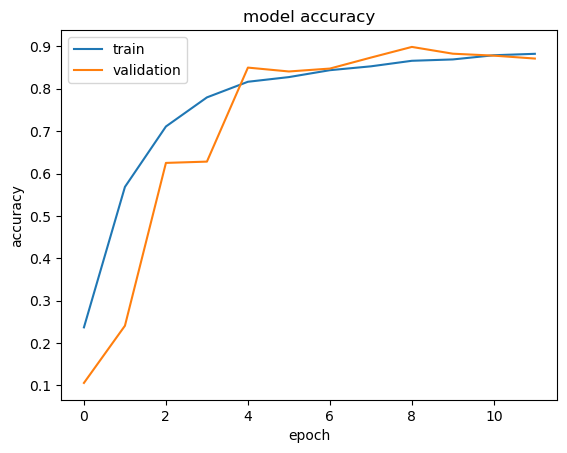

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
test_generator = ImageDataGenerator(rescale=1./255)

In [30]:
class_subset.remove('tan')
class_subset.remove('silver')
class_subset.remove('gold')

In [31]:
testgen = test_generator.flow_from_directory(test,
                                               target_size=(isize, isize),
                                               batch_size=1,
                                               class_mode=None,
                                               classes=class_subset,
                                               shuffle=False
                                               )

Found 1348 images belonging to 12 classes.


In [32]:
model_predict = model1.predict(testgen)

1348/1348 [==============================] - 170s 124ms/step


In [33]:
model_predict.shape

(1348, 12)

In [34]:
df_testprediction = pd.DataFrame(model_predict, index=testgen.filenames, columns=class_subset)

In [35]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_testprediction

,beige,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow
beige/02e37c0e56.jpg,0.6202,0.0040,0.0002,0.1030,0.0141,0.2127,0.0002,0.0018,0.0006,0.0331,0.0084,0.0017
beige/05aeb6ddec.jpg,0.4417,0.0239,0.0015,0.3929,0.0008,0.1197,0.0005,0.0017,0.0005,0.0029,0.0124,0.0013
beige/0b01008bee.jpg,0.4411,0.0277,0.0080,0.0711,0.0010,0.0322,0.0008,0.0403,0.0052,0.0088,0.3548,0.0089
beige/0c3bb456ee.jpg,0.7647,0.0128,0.0013,0.0118,0.0053,0.0336,0.0012,0.0618,0.0183,0.0011,0.0810,0.0070
beige/0e491569c8.jpg,0.9353,0.0006,0.0001,0.0522,0.0001,0.0077,0.0002,0.0017,0.0001,0.0002,0.0011,0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...
yellow/fd1da2f797.jpg,0.0044,0.0001,0.0000,0.0015,0.0002,0.0001,0.0011,0.0000,0.0000,0.0001,0.0000,0.9923
yellow/fd3d2525fb.jpg,0.0013,0.0001,0.0001,0.0004,0.0016,0.0000,0.0000,0.0001,0.0000,0.0000,0.0010,0.9953
yellow/feacf53e9e.jpg,0.0376,0.0009,0.0003,0.0117,0.2296,0.0003,0.0001,0.0003,0.0045,0.0001,0.0005,0.7142
yellow/feeded3e6e.jpg,0.0009,0.0001,0.0000,0.0005,0.2335,0.0001,0.0000,0.0000,0.0013,0.0000,0.0000,0.7634


In [36]:
predicted_classes = np.argmax(model1.predict(testgen), axis=-1) #model.predict_classes(testgen). Argmax returns indices of max values
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

1348/1348 [==============================] - 165s 122ms/step


In [37]:
testgen.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [38]:
predicted_classes


array([ 0,  0,  0, ..., 11, 11, 11])

In [39]:
len(predicted_classes)

1348

In [40]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]), color=("green" if pred_idx == true_idx else "red"))
    fig.savefig('testgallery.png')

In [41]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 85.61%


,Precision,Recall,F-Score,Support
yellow,0.9593,0.9516,0.9555,124.0000
green,0.9630,0.8595,0.9083,121.0000
white,0.9259,0.8721,0.8982,86.0000
orange,0.9174,0.8772,0.8969,114.0000
pink,0.9655,0.8155,0.8842,103.0000
red,0.8269,0.9485,0.8836,136.0000
blue,0.9627,0.8113,0.8805,159.0000
purple,0.9394,0.8087,0.8692,115.0000
beige,0.7959,0.8667,0.8298,90.0000
brown,0.7226,0.8182,0.7674,121.0000


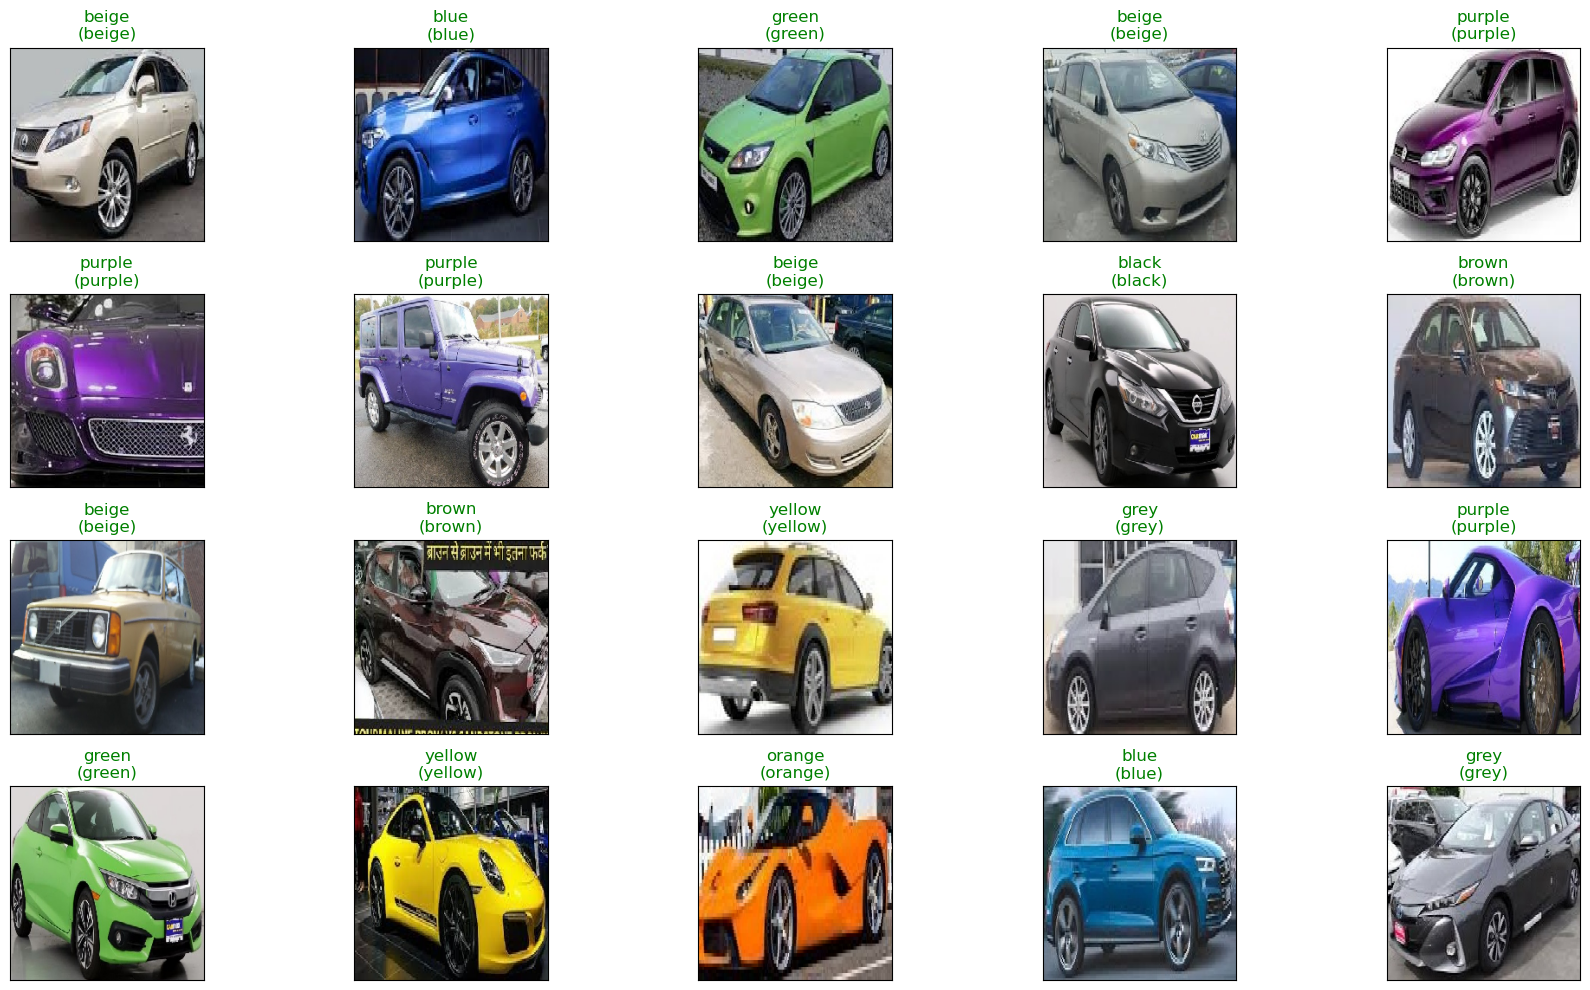

In [45]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [43]:
pd.DataFrame(confusion_matrix(true_classes, predicted_classes), index=list(class_indices.values()), columns=list(class_indices.values()) )

,beige,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow
beige,78,0,0,7,0,5,0,0,0,0,0,0
black,1,77,0,5,0,4,0,0,0,0,0,0
blue,1,13,129,0,0,10,0,0,5,0,1,0
brown,10,5,0,99,0,4,1,0,0,1,1,0
green,1,8,2,2,104,1,1,0,0,0,0,2
grey,3,8,0,9,0,68,0,0,0,0,4,0
orange,0,0,0,5,0,0,100,0,0,6,0,3
pink,0,0,0,0,0,0,1,84,1,17,0,0
purple,0,4,2,8,0,2,0,3,93,3,0,0
red,1,0,0,2,0,0,4,0,0,129,0,0
